#                                         Customer Churn Analysis

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.


# Dataset:
This IBM Sample Dataset has information about Telcom customers and if they left the company within the last month. 
Each row represents a customer, each column contains customer’s attributes described below:

    customerID : Customer ID
    gender : Whether the customer is a male or a female
    SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
    Partner : Whether the customer has a partner or not (Yes, No)
    Dependents : Whether the customer has dependents or not (Yes, No)
    tenure : Number of months the customer has stayed with the company
    PhoneService : Whether the customer has a phone service or not (Yes, No)
    MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
    InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
    OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
    OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
    DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
    TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
    StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
    StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
    Contract : The contract term of the customer (Month-to-month, One year, Two year)
    PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
    PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    MonthlyCharges : The amount charged to the customer monthly
    TotalCharges : The total amount charged to the customer
    Churn : Whether the customer churned or not (Yes or No)



In [116]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
#load data
data=pd.read_csv('Telecom-Usage-Details.csv' )
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [119]:
#check on missing values and unique values per each column
data_check = pd.DataFrame(data.isnull().sum(),columns=['Missing Value Count'])
data_check['Unique Value COunt'] = data.nunique()
data_check

,Missing Value Count,Unique Value COunt
customerID,0,7043
gender,0,2
SeniorCitizen,0,2
Partner,0,2
Dependents,0,2
tenure,0,73
PhoneService,0,2
MultipleLines,0,3
InternetService,0,3
OnlineSecurity,0,3


# Data cleansing:
1-	no need for customer ID variable as it is unique for each customer, not carrying any information and not influencing churn probability.

2-	we can see here that type of Total charge feature is object(string) that's because of blank cells in that column (which don't count in missing values as they are not NAN values) 

so, we will convert it to numeric instead of object data type and replace blank cells with the mean


In [120]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [121]:
#replace nulls with mean value of the column
data['TotalCharges'] = data['TotalCharges'].fillna(value=data['TotalCharges'].mean())
print(data['TotalCharges'].isnull().sum())

0


In [122]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [123]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [124]:
#we will split features to numerical and categorical to deal with each type seperatly 
numeric_features = data[[  'tenure',  'MonthlyCharges', 'TotalCharges']]
categorical_features=data[[ 'SeniorCitizen','gender',  'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod' ,'Churn']]

In [125]:
#count of churn binary classes
data["Churn"].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

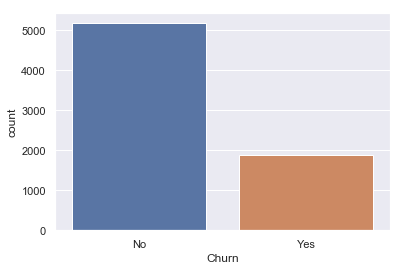

In [126]:
ax = sns.countplot(x=data.Churn)
plt.show()

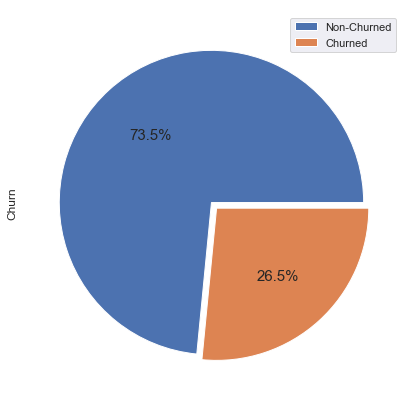

In [127]:
plt.figure(figsize=(10,7))
data['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})
plt.legend(labels=['Non-Churned', 'Churned'])
plt.show()

as we can see 26,5% of customer churned last month.
There is huge class imbalance which is a very important observation to be considered in analysis. 

In [128]:
#It can also be benficial if we look at statistics for each class (Churned and Non-Churned) individually for comparison
Churn_yes = data[data["Churn"]=='Yes']
Churn_yes.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094
std,0.435799,19.531123,24.666053,1890.822994
min,0.000000,1.000000,18.850000,18.850000
25%,0.000000,2.000000,56.150000,134.500000
50%,0.000000,10.000000,79.650000,703.550000
75%,1.000000,29.000000,94.200000,2331.300000
max,1.000000,72.000000,118.350000,8684.800000


In [129]:
Churn_no = data[data["Churn"]=='No']
Churn_no.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124,2554.765772
std,0.334923,24.113777,31.092648,2327.012699
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,15.000000,25.100000,579.575000
50%,0.000000,38.000000,64.425000,1689.175000
75%,0.000000,61.000000,88.400000,4262.850000
max,1.000000,72.000000,118.750000,8672.450000


# 	Customer account information 

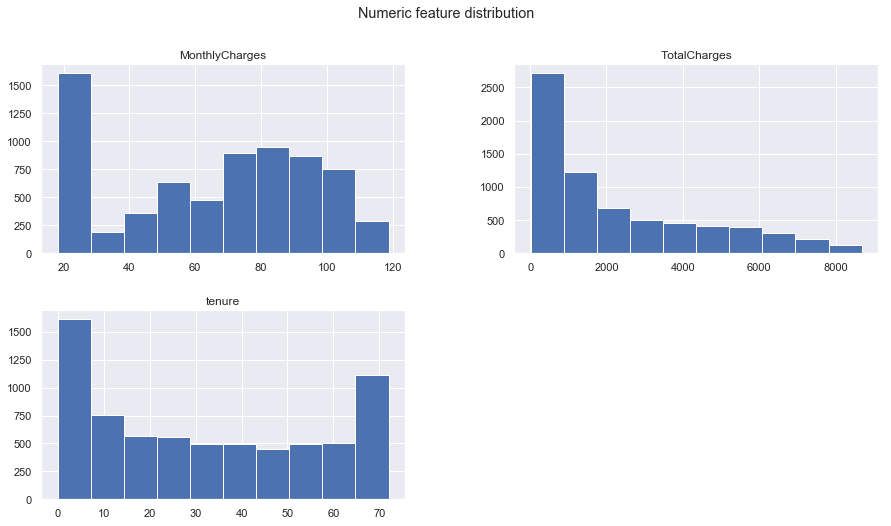

In [130]:
#plot histogram to visualize numeric features distribution
numeric_features.hist(figsize=[15,8])
plt.suptitle("Numeric feature distribution")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



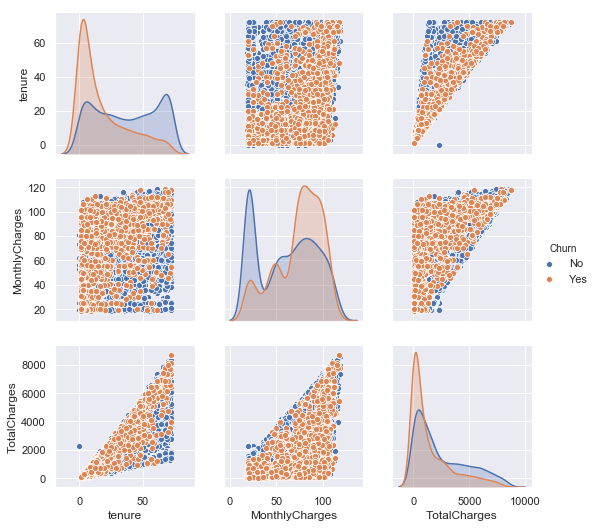

In [131]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

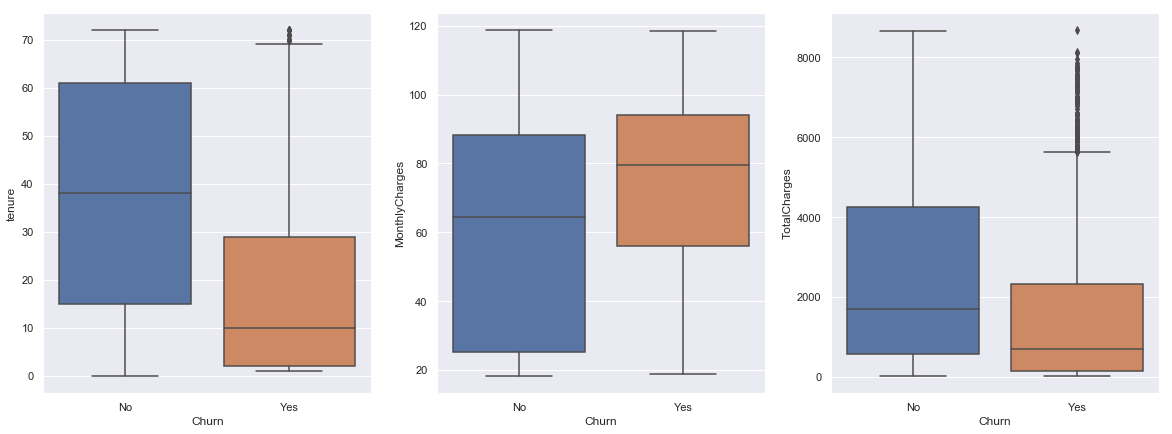

In [132]:
#visualize boxplot of numeric data on different churn classes
sns.set_style('darkgrid')
fig=plt.subplots(figsize=(20,7))
for i, j in enumerate(numeric_features):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace = 0.2, wspace= 0.2)
    sns.boxplot(x='Churn',y=j,data=data)
    

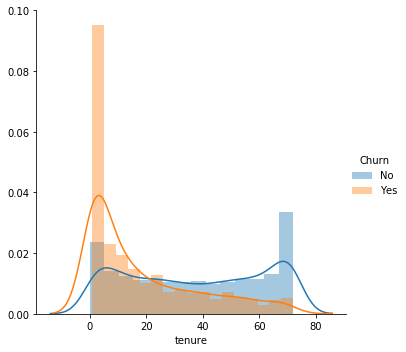

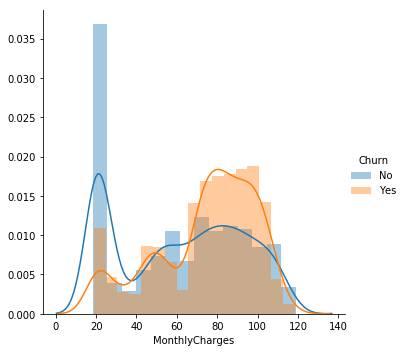

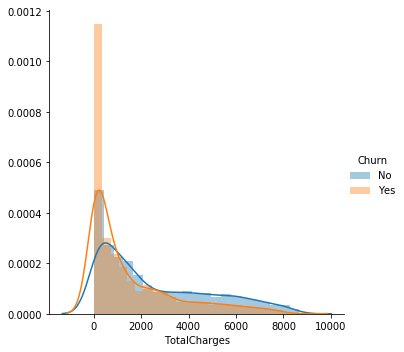

In [18]:
#visualize distribution of numeric features on different churn classes
sns.FacetGrid(data,hue='Churn',height = 5).map(sns.distplot,'tenure'). add_legend()
plt.show()
sns.FacetGrid(data,hue='Churn',height = 5).map(sns.distplot,'MonthlyCharges'). add_legend()
plt.show()
sns.FacetGrid(data,hue='Churn',height = 5).map(sns.distplot,'TotalCharges'). add_legend()
plt.show()

From the plots above we can conclude that:

    Recent clients are more likely to churn
    Clients with higher MonthlyCharges are also more likely to churn
   

People having lower tenure and higher monthly charges are tend to churn more. Also as you can see having month-to-month contract have a really huge effect on churn probability.



# Demographic features Analysis

In [19]:
#Calculate portion of different Gender on different churn classes
(data.groupby(['gender', 'Churn']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count') )

,gender,Churn,count
0,Male,No,2625
1,Female,No,2549
2,Female,Yes,939
3,Male,Yes,930


In [20]:
SUM = data.groupby(['Churn','gender']).agg({'customerID': 'count'})
Proportion = SUM.groupby(level=0).apply(lambda x:round((100 * x / float(x.sum())),2))
Proportion

customerID
Churn gender            
No    Female       49.27
      Male         50.73
Yes   Female       50.24
      Male         49.76

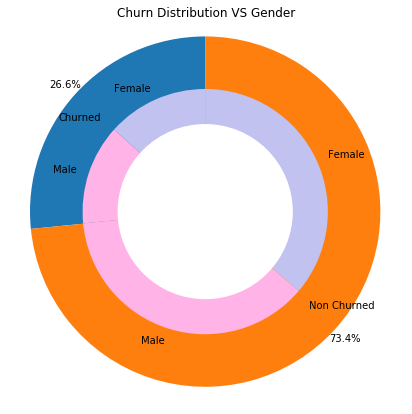

In [21]:
plt.figure(figsize=(7, 7))
Customer =["Churned", "Non Churned"]
Customer_Counts = [1869, 5164]
Gender = ["Female", "Male", "Male",  "Female"]
Gender_Counts = [939,930 ,2625 ,2549 ]
Gender_Colors = ['#c2c2f0','#ffb3e6','#ffb3e6', '#c2c2f0']
plt.pie(Customer_Counts,labels=Customer,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8, startangle=90,frame=True,radius=10,  counterclock = True )
plt.pie(Gender_Counts,colors= Gender_Colors,  labels=Gender,startangle=90,radius=7,  counterclock = True )
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Churn Distribution VS Gender')
plt.axis('equal')
plt.show()



As we can see here Customer Gender doesn't influence churn probability

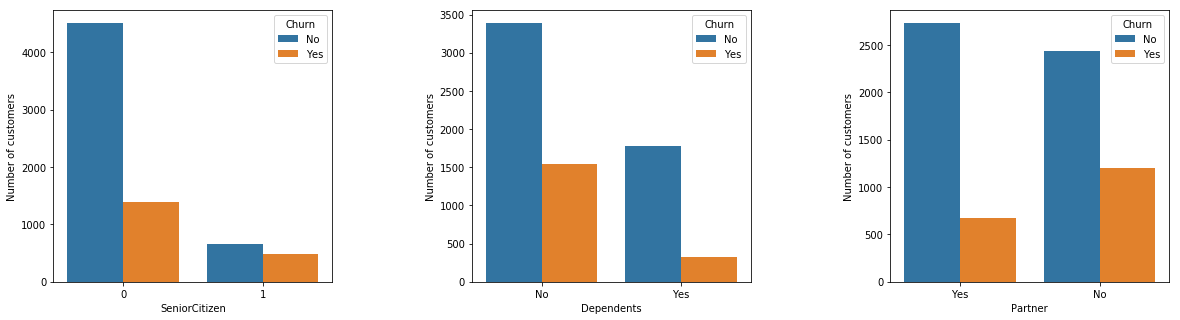

In [22]:
fig=plt.subplots(figsize=(20,5))
for i, j in enumerate(data[['SeniorCitizen','Dependents',  'Partner']]):
    plt.subplot(1, 3, i+1)
    plt.subplots_adjust(hspace = 0.5, wspace= 0.5)
    sns.countplot(x = j, hue= 'Churn' ,data = data)
    plt.ylabel('Number of customers')
    plt.xlabel(j)

In [23]:
#propotion of Senior Citizen
SUM = data.groupby(['SeniorCitizen','Churn']).agg({'customerID': 'count'})
Proportion = SUM.groupby(level=0).apply(lambda x:round((100 * x / float(x.sum())),2))
Proportion

customerID
SeniorCitizen Churn            
0             No          76.39
              Yes         23.61
1             No          58.32
              Yes         41.68

1-Customers that don't have partners are more likely to churn(almost twice the amount of customers who has partner).

2-It can be noticed that the proportion of senior citizen is very less (only 16% from the total of customers) but the churn rate is 42% almost half of the Senior Citizen customer decided to unsubcribe last month.

3-Customers with no dependents are more likely to churn 

# 	Services that each customer has registered  

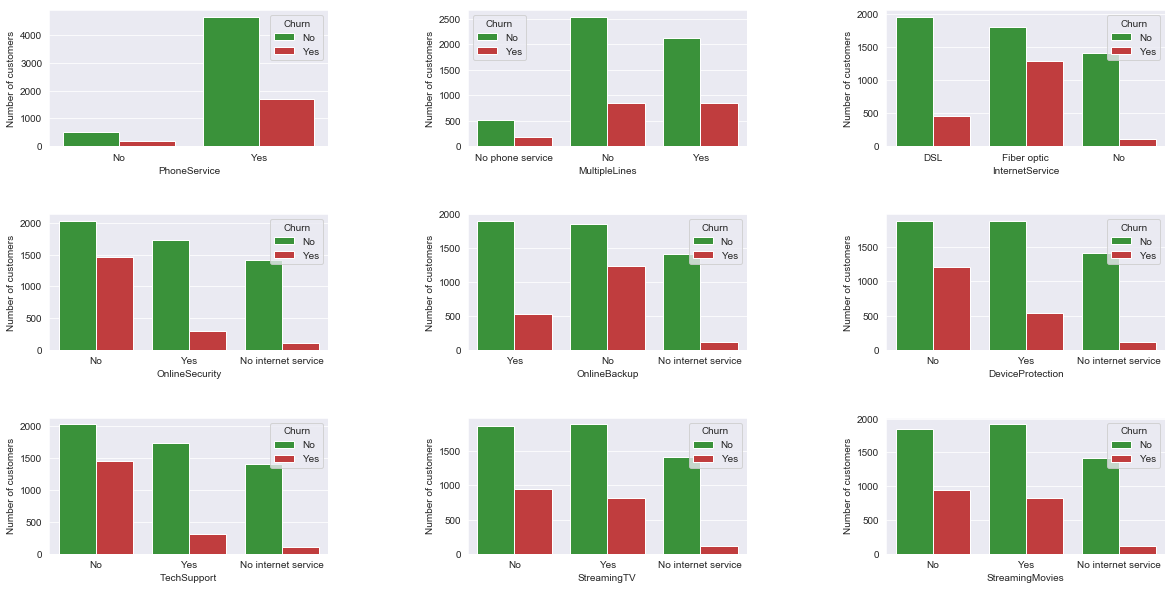

In [24]:
sns.set_style('darkgrid')
fig=plt.subplots(figsize=(20,10))
for i, j in enumerate(data[['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',  'DeviceProtection' , 'TechSupport' , 'StreamingTV','StreamingMovies']]):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 0.5, wspace= 0.5)
    sns.countplot(x = j, hue= 'Churn' ,data = data, palette=["C2", "C3"])
    plt.ylabel('Number of customers')
    plt.xlabel(j)

These features show significant variations across their values.
1-Very small fraction of customers don't have a phone service and customer who doesn’t have phone service, they can’t have multiple lines.

2-Customers who has Internet Service with Fiber Optic are more likely to churn than DSL. Fiber optic service is much more expensive than DSL, which may be one of the reasons why customers churn and  

2- Customers with  OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn.

3-Streaming Services doesn't look like that much difference.


# Different  Payment Methods

In [63]:
fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b> Payment Method distribution VS Churn</b>")
fig.show()

In [69]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5)])
fig.update_layout(title_text="<b>Payment Methods</b>")
fig.show()



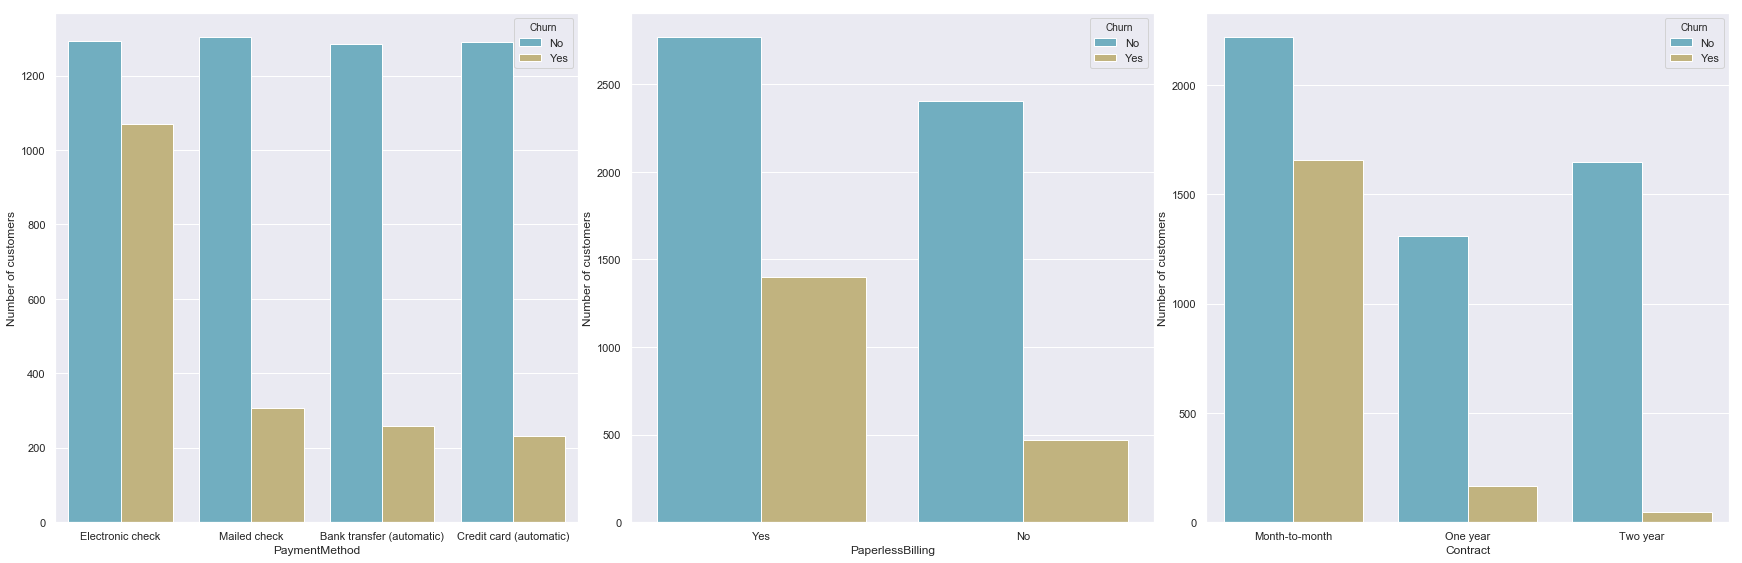

In [39]:
sns.set_style('darkgrid')
fig=plt.subplots(figsize=(30,30))
for i, j in enumerate(data[['PaymentMethod','PaperlessBilling','Contract']]):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 0.1, wspace= 0.1)
    sns.countplot(x = j, hue= 'Churn' ,data = data, palette=["C9", "C8"])
    plt.ylabel('Number of customers')
    plt.xlabel(j)

In [53]:
#Contract proportion
SUM = data.groupby(['Churn','Contract']).agg({'customerID': 'count'})
Proportion = SUM.groupby(level=0).apply(lambda x:round((100 * x / float(x.sum())),2))
Proportion

customerID
Churn Contract                  
No    Month-to-month       42.91
      One year             25.26
      Two year             31.83
Yes   Month-to-month       88.55
      One year              8.88
      Two year              2.57

In [68]:
fig = px.histogram(data, x="PaperlessBilling", color="Churn",  title="<b>Paperless Billing VS Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

*The shorter the contract, the higher the churn rate. About 88% of customer with Month-to-Month Contract opted to move out as compared to 9% of customrs with One Year Contract and 3% with Two Year Contract

*Churn Rate is higher for the customers who opted for paperless billing.  

*Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.



*Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.



# Building Model

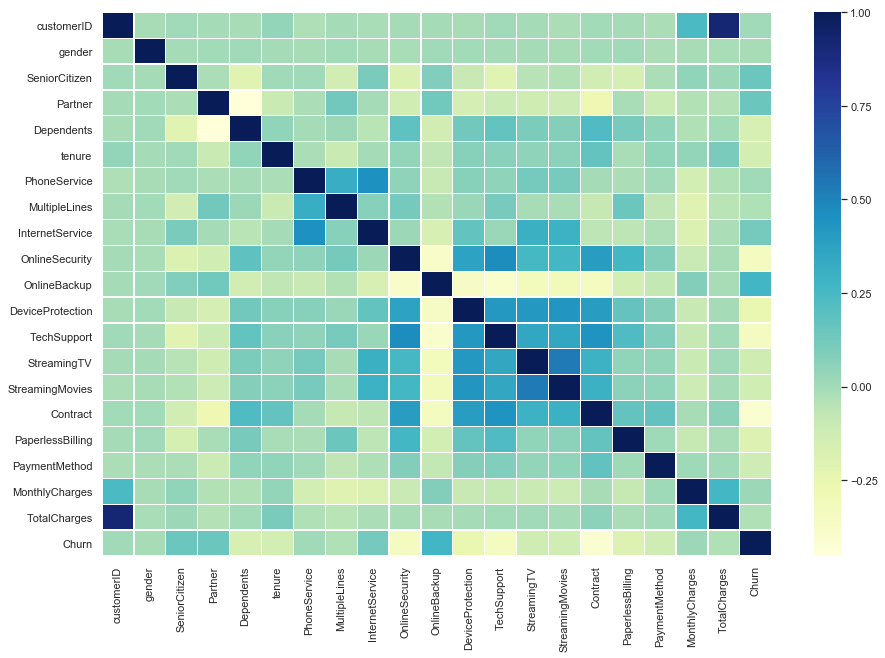

In [90]:
#Check corelation between features
plt.figure(figsize=(15, 10))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")


In [96]:
#Remove customer IDs from the data set
df = data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,1,0,0,29.85,29.85,0
1,0,0,1,1,34,0,1,1,0,1,0,1,1,1,0,1,0,56.95,1889.50,0
2,0,0,1,1,2,0,1,1,0,0,1,1,1,1,1,0,0,53.85,108.15,1
3,0,0,1,1,45,1,0,1,0,1,0,0,1,1,0,1,1,42.30,1840.75,0
4,1,0,1,1,2,0,1,0,1,1,1,1,1,1,1,0,0,70.70,151.65,1


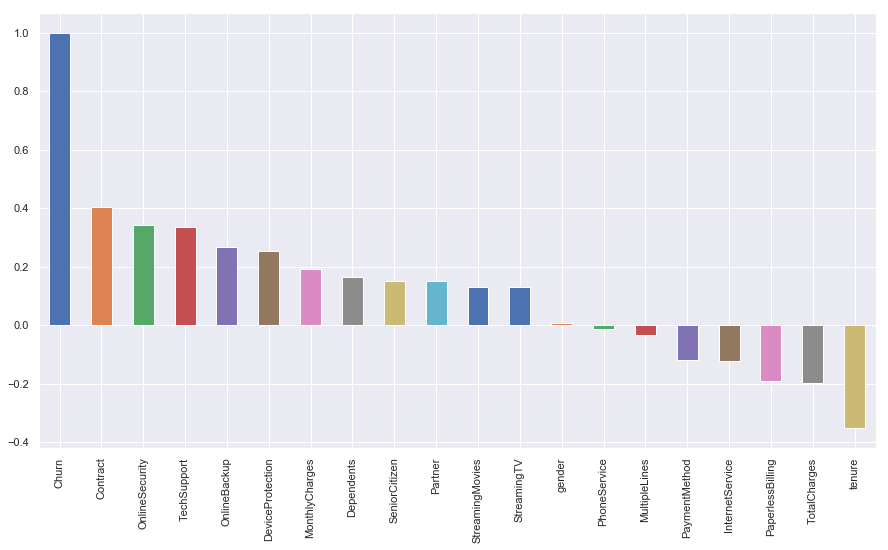

In [97]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

In [100]:

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Features Normalization
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [101]:
# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [102]:
# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)



In [103]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8035967818267865


AxesSubplot(0.125,0.125;0.775x0.755)


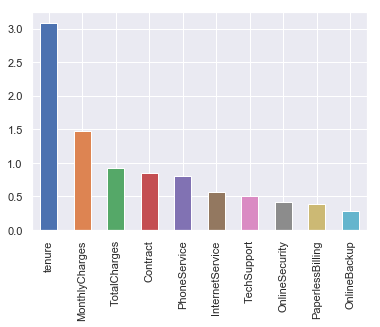

In [105]:
# Get the weights of most important features
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (abs(weights).sort_values(ascending = False)[:10].plot(kind='bar'))